In [1]:
import pandas as pd
import numpy as np


In [17]:
df = pd.read_csv('training_data.csv')

# clean and keep only the data we want
data =[]
data = df[['id','stars','starVotes','length','ascent','descent', 'high', 'low', 
          'longitude','latitude', 'difficulty']]
data["difficulty"].unique()

array(['black', 'blueBlack', 'blue', 'green', 'dblack', 'greenBlue'],
      dtype=object)

In [18]:
# replace categorical variable 'difficulty' with int
mapping = {'green': 1, 'greenBlue': 2, 'blue': 3, 'blueBlack': 4, 'black': 5, 'dblack': 6}
data.replace(to_replace = {'difficulty' : mapping}, inplace = True)
data.describe()

/Users/iryna/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regex=regex,


,id,stars,starVotes,length,ascent,descent,high,low,longitude,latitude,difficulty
count,2.824000e+03,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000,2824.000000
mean,7.038744e+06,4.185942,7.789660,8.164837,1137.209986,-1065.430241,3837.538244,3031.027266,-97.885732,42.528836,3.281870
std,2.702557e+04,1.146773,19.438806,18.645545,2345.459481,2355.071712,3439.945213,2757.346092,15.356823,4.249339,1.351667
min,7.000000e+06,0.000000,0.000000,0.000000,0.000000,-54394.000000,0.000000,-280.000000,-121.591800,34.783200,1.000000
25%,7.016145e+06,4.000000,1.000000,1.800000,111.000000,-1105.500000,978.250000,779.750000,-111.617300,39.059575,3.000000
50%,7.035008e+06,4.500000,2.000000,4.000000,412.500000,-335.000000,2497.500000,1804.500000,-98.509300,42.551450,3.000000
75%,7.054825e+06,5.000000,6.000000,8.000000,1311.500000,-90.000000,6348.500000,5046.750000,-84.294600,45.566800,5.000000
max,7.093274e+06,5.000000,278.000000,308.300000,58094.000000,0.000000,14433.000000,12745.000000,-68.909700,53.954400,6.000000


In [19]:
data['difficulty'].unique()

array([5, 4, 3, 1, 6, 2])

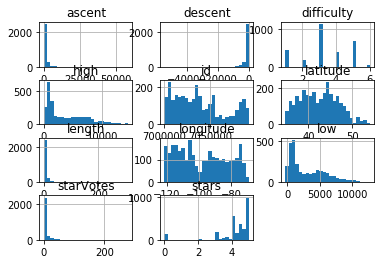

In [20]:
from matplotlib import pyplot as plt
data.hist(bins = 25)
#plt.savefig('training_data')
plt.show()

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

data_final = data[['length','ascent','descent', 'high', 'low', 
          'longitude','latitude', 'difficulty']]


X = data_final.loc[:, data_final.columns != 'difficulty']
y = data_final.loc[:, data_final.columns == 'difficulty']

# now, we need to split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)



In [22]:
from imblearn.over_sampling import SMOTE
import statsmodels.api as sm

columns = X_train.columns
os = SMOTE(random_state=0)
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['difficulty'])


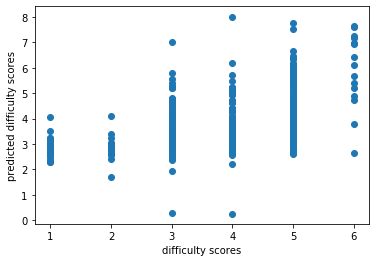

In [23]:
regressor = LinearRegression() 
LR = regressor.fit(os_data_X, os_data_y)
score = LR.score(X_test, y_test)
y_pred = LR.predict(X_test)
plt.figure()
plt.scatter(y_test,y_pred)
plt.xlabel('difficulty scores')
plt.ylabel('predicted difficulty scores')
plt.savefig('prediction_scores')
plt.show()


In [24]:
y_pred = LR.predict(X_test)
print('Accuracy of logistic regression classifier on training set: {:.2f}'.format(LR.score(X_train, y_train)))
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(LR.score(X_test, y_test)))

Accuracy of logistic regression classifier on training set: 0.26
Accuracy of logistic regression classifier on test set: 0.27


In [25]:
ols_model = sm.OLS(os_data_y,os_data_X)
result = ols_model.fit()
print(result.summary2())


                        Results: Ordinary least squares
Model:                  OLS              Adj. R-squared (uncentered): 0.879     
Dependent Variable:     difficulty       AIC:                         16684.6089
Date:                   2020-06-15 22:34 BIC:                         16729.9958
No. Observations:       4836             Log-Likelihood:              -8335.3   
Df Model:               7                F-statistic:                 4999.     
Df Residuals:           4829             Prob (F-statistic):          0.00      
R-squared (uncentered): 0.879            Scale:                       1.8418    
------------------------------------------------------------------------------------
                 Coef.      Std.Err.        t         P>|t|       [0.025      0.975]
------------------------------------------------------------------------------------
length          -0.0088       0.0016      -5.4875     0.0000     -0.0120     -0.0057
ascent          -0.0000       0.0000 